In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


C:\Users\bartm\AppData\Local\Temp\ipykernel_57416\3169127903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)


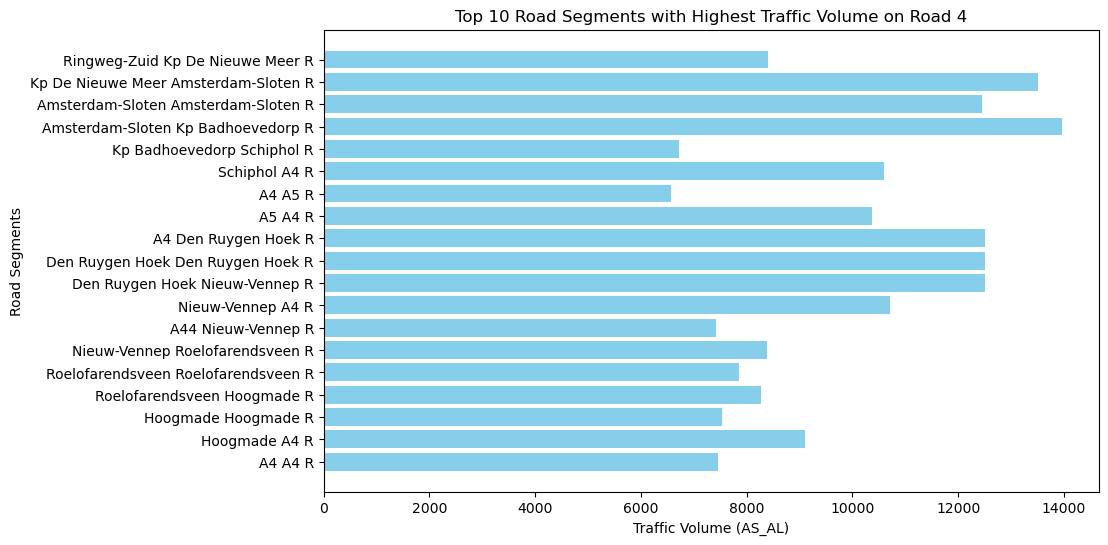

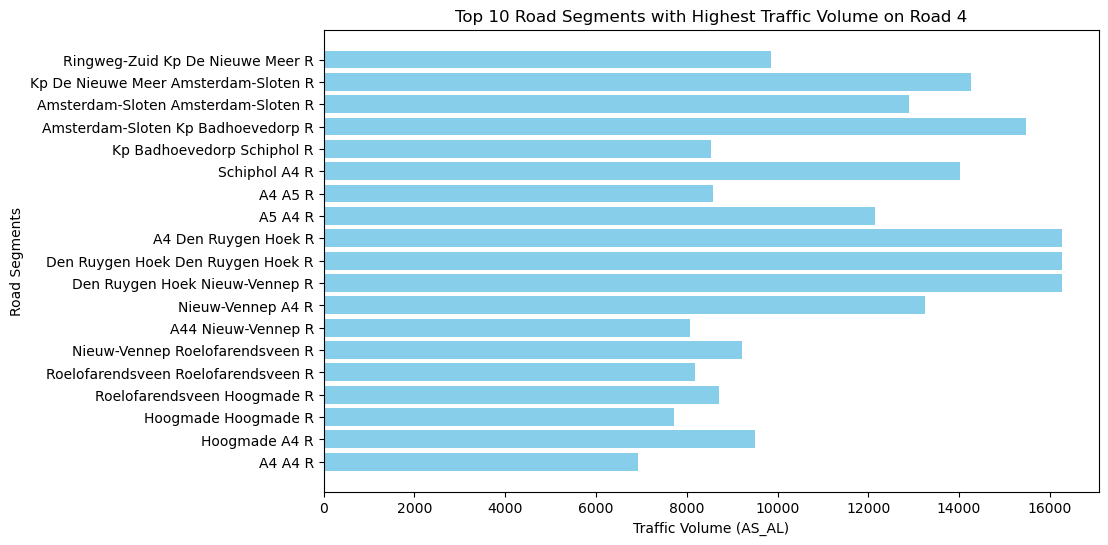

,VIAS-baannr,Wegnr_van,Wegnr_naar,Hm_van,Hm_naar,Traject_van,Traject_naar,etmaal_AL,OS_AL,AS_AL,Ri_naar,Baantype_naar,Baantype_van,Traject
2156,5111,4.0,4.0,21,1419,Ringweg-Zuid,Kp De Nieuwe Meer,66000,8406,9866,R,HR,HR,Ringweg-Zuid Kp De Nieuwe Meer R
2142,5087,4.0,4.0,1419,1851,Kp De Nieuwe Meer,Amsterdam-Sloten,99700,13512,14267,R,HR,HR,Kp De Nieuwe Meer Amsterdam-Sloten R
2128,5041,4.0,4.0,1851,2752,Amsterdam-Sloten,Amsterdam-Sloten,90700,12445,12888,R,HR,HR,Amsterdam-Sloten Amsterdam-Sloten R
2082,4947,4.0,4.0,2752,3390,Amsterdam-Sloten,Kp Badhoevedorp,103600,13959,15482,R,HR,HR,Amsterdam-Sloten Kp Badhoevedorp R
2036,4821,4.0,4.0,3390,6094,Kp Badhoevedorp,Schiphol,51700,6719,8530,R,HR,HR,Kp Badhoevedorp Schiphol R
1997,4728,4.0,4.0,6094,7827,Schiphol,A4,68400,9234,11605,R,HR,HR,Schiphol A4 R
1931,4592,4.0,4.0,9072,9865,Schiphol,A4,84700,10591,14021,R,HR,HR,Schiphol A4 R
1846,4366,4.0,4.0,9865,10796,A4,A5,58000,6577,8573,R,HR,HR,A4 A5 R
1735,4150,4.0,4.0,10796,13678,A5,A4,85200,10361,12148,R,HR,HR,A5 A4 R
7613,4024,4.0,4.0,13678,14560,A4,Den Ruygen Hoek,107000,12504,16263,R,HR,HR,A4 Den Ruygen Hoek R


In [63]:
# data importeren
data = pd.read_excel('datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx')

selected_columns = data[['VIAS-baannr', 'Wegnr_van','Wegnr_naar','Hm_van','Hm_naar','Traject_van', 'Traject_naar', 'etmaal_AL', 'OS_AL',
                         'AS_AL','Ri_naar' , 'Baantype_naar', 'Baantype_van']]

selected_columns['Traject'] = data['Traject_van'].astype(str) + ' ' + data['Traject_naar'].astype(str) + ' ' + data['Ri_naar'].astype(str)

df_road_4 = selected_columns[ (selected_columns['Wegnr_van'] == 4) & (selected_columns['Wegnr_naar'] == 4) & 
                             (selected_columns['Baantype_naar'] == 'HR') & (selected_columns['Baantype_van'] == 'HR') & 
                             (selected_columns['Ri_naar'] == 'R') ] 


df_road_4_sorted = df_road_4.sort_values(by='Hm_van', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(20), df_road_4_sorted['OS_AL'].head(20), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume on Road 4')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(df_road_4_sorted['Traject'].head(20), df_road_4_sorted['AS_AL'].head(20), color='skyblue')
plt.xlabel('Traffic Volume (AS_AL)')
plt.ylabel('Road Segments')
plt.title('Top 10 Road Segments with Highest Traffic Volume on Road 4')
plt.gca().invert_yaxis()
plt.show()
df_road_4_sorted.head(20)